## Task 1 : Utilize the below satellite image link to perform the following tasks :

# a. convert the image to grayscale and apply noise reduction techniques for preprocessing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


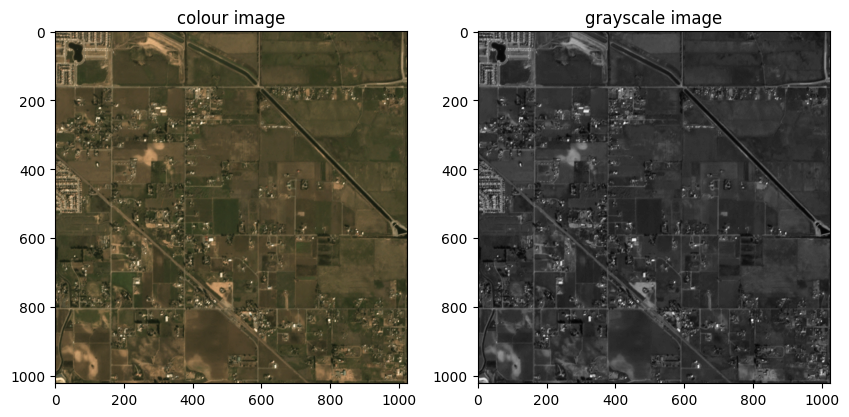

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
imagepath= '/'
# Read in the image
image = cv2.imread(imagepath)
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#Convert to grayscale
grayscale_img=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("colour image")

plt.subplot(1,2,2)
plt.imshow(grayscale_img,cmap='gray')
plt.title("grayscale image")

plt.show()


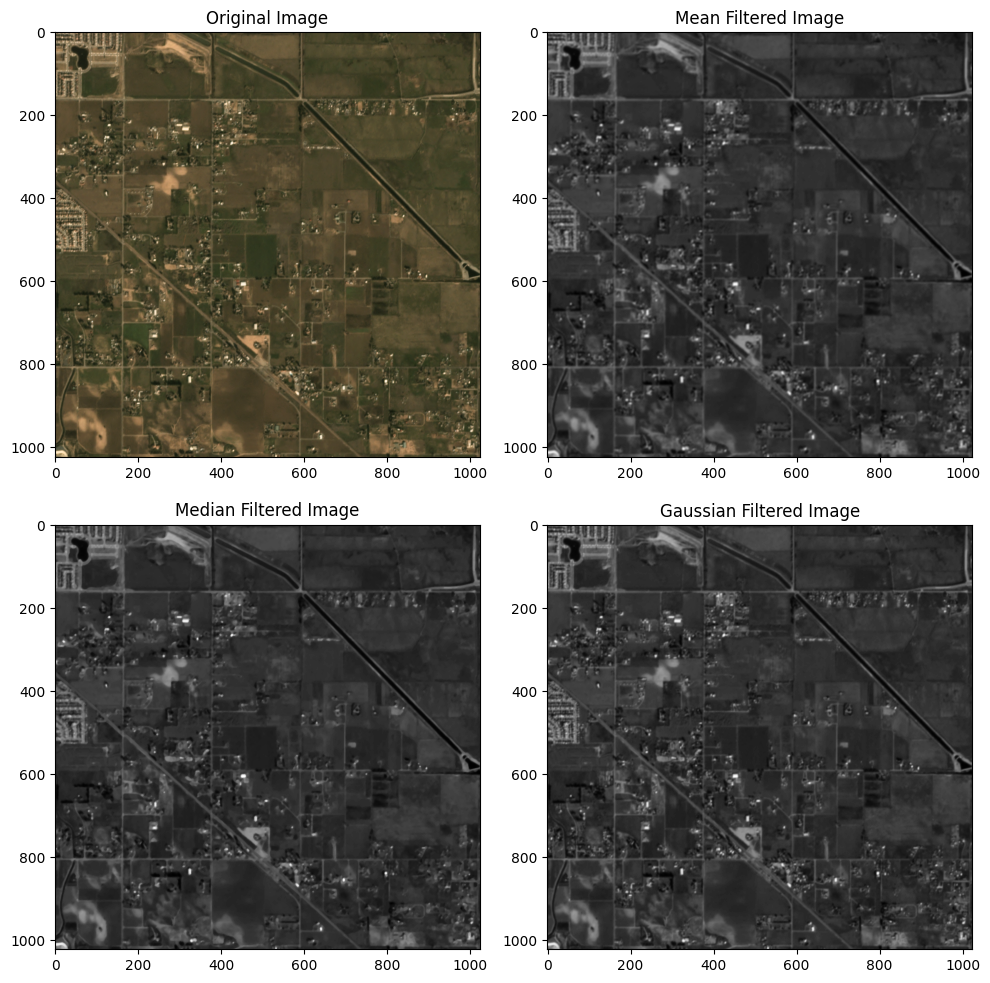

In [ ]:
# Apply Noise Reduction techniques
# Apply mean filter
mean_filtered = cv2.blur(grayscale_img, (5, 5))

# Apply median filter
median_filtered = cv2.medianBlur(grayscale_img, 5)

# Apply Gaussian filter
gaussian_filtered = cv2.GaussianBlur(grayscale_img, (5, 5), 0)

# Display the original and filtered images
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(mean_filtered, cmap='gray')
plt.title('Mean Filtered Image')

plt.subplot(2, 2, 3)
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filtered Image')

plt.subplot(2, 2, 4)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filtered Image')

plt.tight_layout()
plt.show()

## b. Utilize edge detection algorithms to identify boundaries between buildings and background.

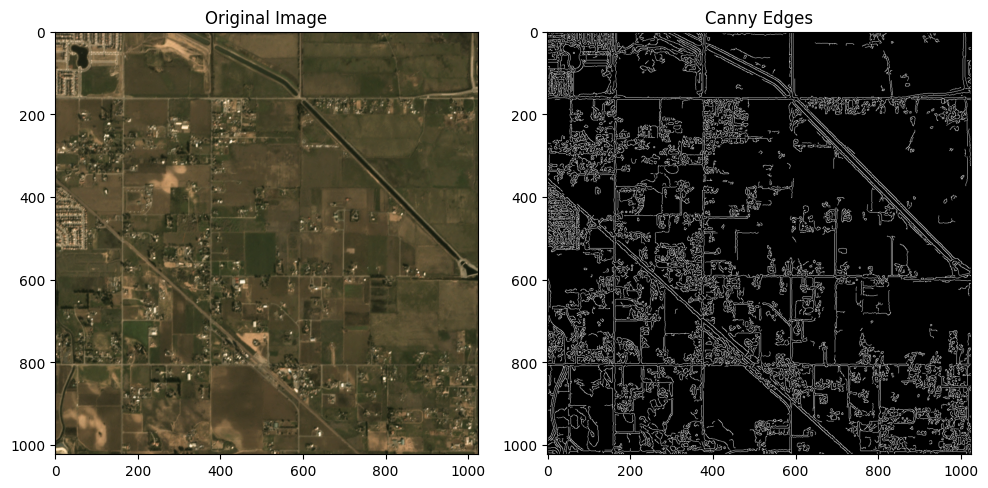

In [ ]:
# Apply Canny edge detection
edges = cv2.Canny(gaussian_filtered, 25, 50)  # Adjust the thresholds as needed

# Display the original image and the detected edges
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')

plt.tight_layout()
plt.show()

# c. Implement algorithms like K-Means clustering to group pixels with similar characteristics

In [ ]:
# Display the shape of the grayscale image
print("Image shape (height, width, channels):", edges.shape)

Image shape (height, width, channels): (1023, 1024)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


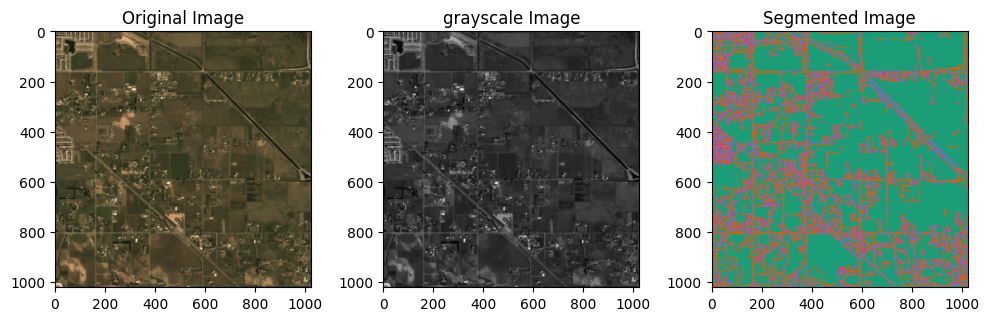

In [ ]:
# Building Kmean segemntaion using SKLEARN Library
from sklearn.cluster import KMeans
reshaped_image = edges.reshape((-1, 1))

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(reshaped_image)
segmented_image = kmeans.labels_.reshape(edges.shape)

# Display the original and segmented images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(grayscale_img,cmap='gray')
plt.title('grayscale Image')

plt.subplot(1, 3, 3)
plt.imshow(segmented_image, cmap='Dark2')
plt.title('Segmented Image')

plt.tight_layout()
plt.show()


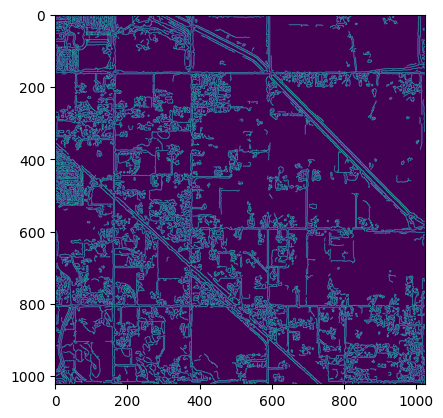

In [ ]:
## Building KMEANS Segmentation by calculating the centroids.
reshaped_image = edges.reshape((-1, 1))
# Convert to float type
pixel_vals = np.float32(reshaped_image)
#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 2
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((edges.shape))

plt.imshow(segmented_image,cmap='viridis')

# d. Refine the segmentation mask based on the evaluation. This could involve morphological operations

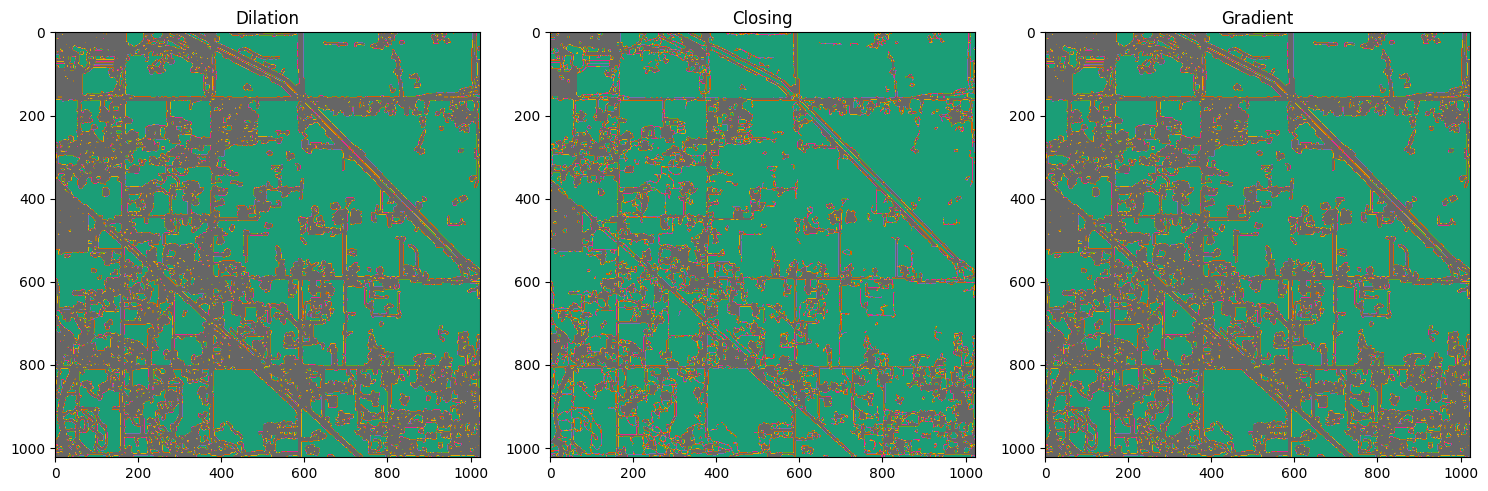

In [ ]:
# Define the kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)
segmented_image = np.uint8(segmented_image)

# Apply dilation
dilation = cv2.dilate(segmented_image, kernel, iterations=1)

# Apply closing (dilation followed by erosion)
closing = cv2.morphologyEx(segmented_image, cv2.MORPH_CLOSE, kernel)

# Apply gradient (difference between dilation and erosion)
gradient = cv2.morphologyEx(segmented_image, cv2.MORPH_GRADIENT, kernel)

# Display the images
plt.figure(figsize=(15, 10))


plt.subplot(2, 3, 1)
plt.imshow(dilation, cmap='Dark2')
plt.title('Dilation')

plt.subplot(2, 3, 2)
plt.imshow(closing, cmap='Dark2')
plt.title('Closing')

plt.subplot(2, 3, 3)
plt.imshow(gradient, cmap='Dark2')
plt.title('Gradient')

plt.tight_layout()
plt.show()

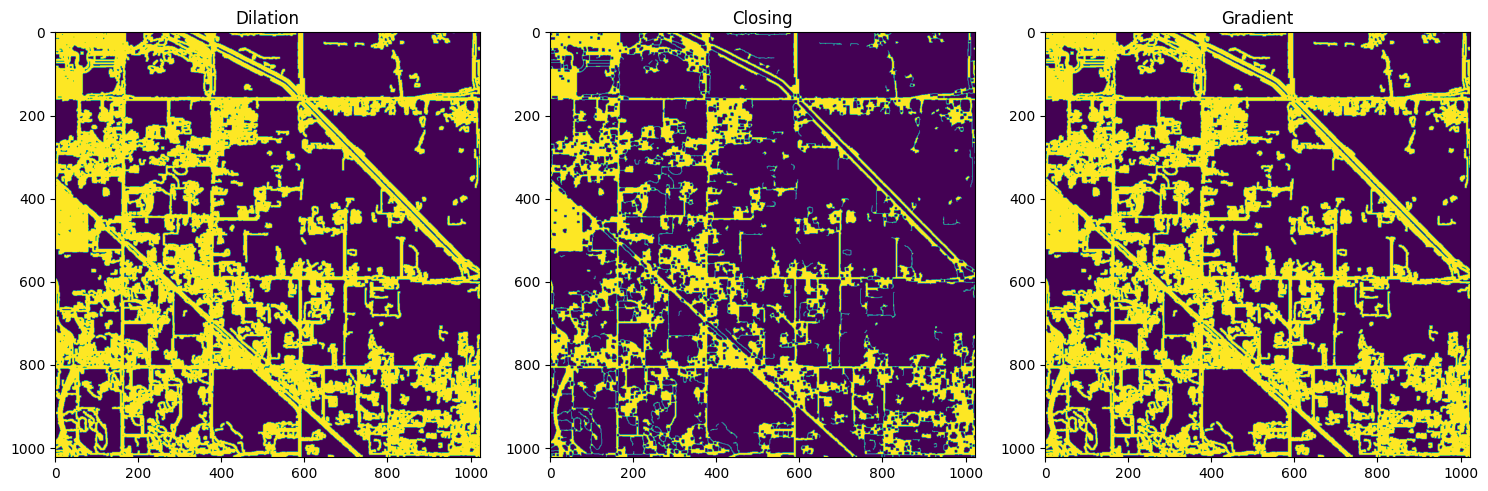

In [ ]:
# Define the kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)
segmented_image = np.uint8(segmented_image)

# Apply dilation
dilation = cv2.dilate(segmented_image, kernel, iterations=1)

# Apply closing (dilation followed by erosion)
closing = cv2.morphologyEx(segmented_image, cv2.MORPH_CLOSE, kernel)

# Apply gradient (difference between dilation and erosion)
gradient = cv2.morphologyEx(segmented_image, cv2.MORPH_GRADIENT, kernel)

# Display the images
plt.figure(figsize=(15, 10))


plt.subplot(2, 3, 1)
plt.imshow(dilation, cmap='viridis')
plt.title('Dilation')

plt.subplot(2, 3, 2)
plt.imshow(closing, cmap='viridis')
plt.title('Closing')

plt.subplot(2, 3, 3)
plt.imshow(gradient, cmap='viridis')
plt.title('Gradient')

plt.tight_layout()
plt.show()

# e. Create a visualization that overlays the segmentation mask on the original image to highlight the segmented buildings

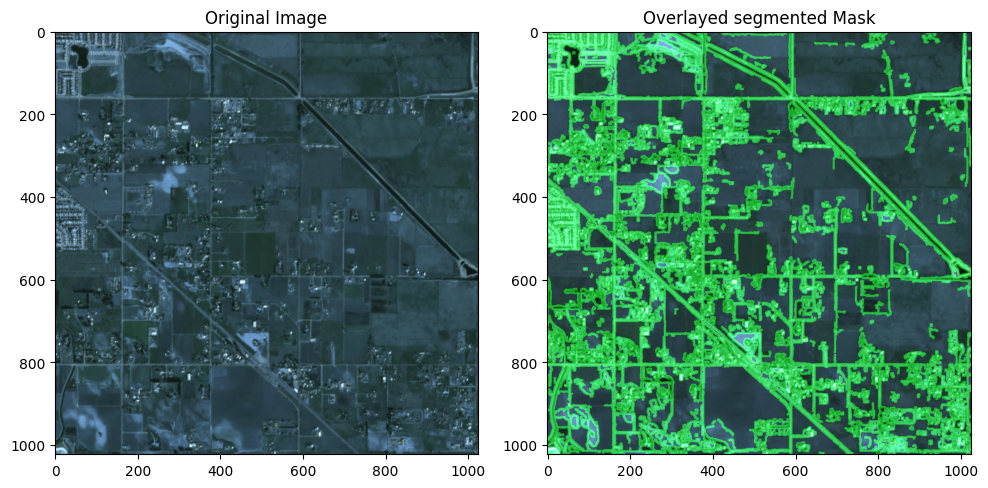

In [ ]:
# Create a color mask for buildings (e.g., green color for buildings)
color_mask = np.zeros_like(image)
color_mask[gradient>0] = [0, 255, 0]  # Green color for buildings

# Overlay the color mask on the original image
overlay_image = cv2.addWeighted(image, 1, color_mask, 0.5, 0)

# Display the overlay image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(overlay_image, cv2.COLOR_BGR2RGB))
plt.title('Overlayed segmented Mask')

plt.tight_layout()
plt.show()

# Task 2 : Load a pre-trained segmentation algorithm , fine-tuning it if necessary to isolate regions based on pixel intensities

In [ ]:
!unzip /content/drive/MyDrive/colabdataset/satelliteimg.zip

Archive:  /content/drive/MyDrive/colabdataset/satelliteimg.zip
   creating: satelliteimg/
   creating: satelliteimg/train/
  inflating: satelliteimg/train/global_monthly_2018_01_mosaic_L15-0331E-1257N_1327_3160_13.tif  
  inflating: satelliteimg/train/global_monthly_2018_01_mosaic_L15-0357E-1223N_1429_3296_13.tif  
  inflating: satelliteimg/train/global_monthly_2018_02_mosaic_L15-0331E-1257N_1327_3160_13.tif  
  inflating: satelliteimg/train/global_monthly_2018_03_mosaic_L15-0331E-1257N_1327_3160_13.tif  
  inflating: satelliteimg/train/global_monthly_2018_04_mosaic_L15-0357E-1223N_1429_3296_13.tif  
   creating: satelliteimg/trainannot/
  inflating: satelliteimg/trainannot/global_monthly_2018_01_mosaic_L15-0331E-1257N_1327_3160_13.png  
 extracting: satelliteimg/trainannot/global_monthly_2018_01_mosaic_L15-0357E-1223N_1429_3296_13.png  
  inflating: satelliteimg/trainannot/global_monthly_2018_02_mosaic_L15-0331E-1257N_1327_3160_13.png  
  inflating: satelliteimg/trainannot/global_mont

In [ ]:
!pip install -U segmentation-models-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_6

# 1. Data Loading and processing

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from random import random

# import pytorch related modules
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import Compose, ToTensor, Resize

from torch.nn import Sequential
from torch.nn import Conv2d, ReLU, Sigmoid, BatchNorm2d, Dropout

from torchvision.models.segmentation import fcn_resnet101
import segmentation_models_pytorch as smp
import segmentation_models_pytorch.utils

In [ ]:
#Defining the directory path for train , validation images
x_train_dir = '/content/satelliteimg/train'
y_train_dir = '/content/satelliteimg/trainannot'

x_val_dir = '/content/satelliteimg/val'
y_val_dir = '/content/satelliteimg/valannot'


In [ ]:
# define custom dataset class
class SatelliteDataset(Dataset):
    def __init__(self, images_dir, masks_dir=None, transforms=None, training_type=None):
        # get all image names
        self.image_names = os.listdir(images_dir)

        # set training type, transforms
        self.training_type = training_type
        self.transforms = transforms

        # get image and target paths
        self.images_paths = []
        self.masks_paths = []
        for image_name in self.image_names:
            self.images_paths.append(os.path.join(images_dir, image_name))
            if self.training_type=="train" or self.training_type=="val":
                self.masks_paths.append(os.path.join(masks_dir, image_name.split('.')[0] + '.png'))

    def __getitem__(self, i):

        if self.training_type=="train" or self.training_type=="val":
            # read data
            image = Image.open(self.images_paths[i]).convert("RGB")
            mask = Image.open(self.masks_paths[i]).convert("L")
            # preprocess mask
            mask = np.array(mask)
            threshold_value = 127  # Adjust this threshold value as needed
            mask = (mask > threshold_value).astype(np.uint8)  # Pixels above threshold become 1, others become 0
            mask = Image.fromarray(mask * 255)  # Convert to 0-255 scale for PIL Image

            # apply transforms
            image = self.transforms(image)
            mask = self.transforms(mask)

            return image, mask

        else:
            # read data
            image = Image.open(self.images_paths[i])

            # apply transforms
            image = self.transforms(image)

            return image

    def __len__(self):
        return len(self.image_names)


In [ ]:
# create transform
train_transforms = Compose([
    Resize((224, 224)),
    ToTensor()
])
# create instance of custom dataset
train_dataset = SatelliteDataset(
    x_train_dir,
    y_train_dir,
    transforms=train_transforms,
    training_type='train'
)

# create dataloader
train_loader = DataLoader(
    train_dataset,
    batch_size=5,
    num_workers=4
)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# 2. Define the Unet pretrained model for Segmentation

In [ ]:
# create segmentation model with pretrained encoder
model = smp.Unet(
    encoder_name='resnet18',
    encoder_weights='imagenet',
    classes=1,
    activation='sigmoid',
    in_channels=3
)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 289MB/s]


In [ ]:
model

Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [ ]:
# check for one iteration of loop
for batch_x, batch_y in train_loader:
    break

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
batch_x.shape

torch.Size([5, 3, 224, 224])

In [ ]:
batch_y.shape

torch.Size([5, 1, 224, 224])

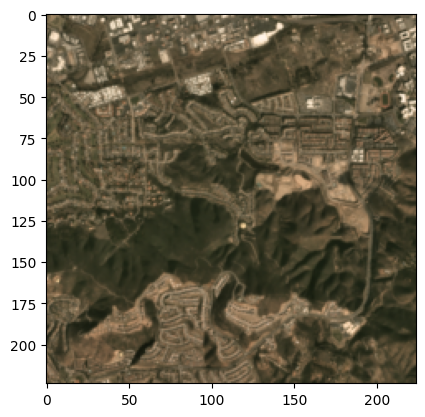

In [ ]:
# Assuming batch_x is a batch of images
plt.imshow(batch_x[2].permute(1, 2, 0))
plt.show()

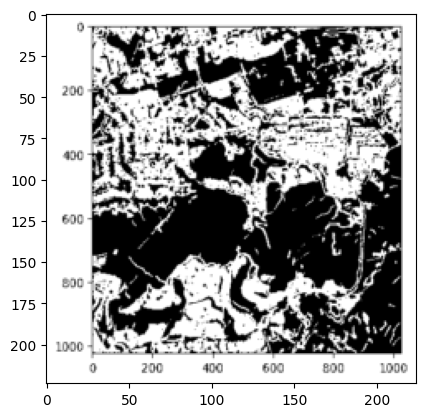

In [ ]:
# Assuming batch_x is a batch of images
plt.imshow(batch_y[2].permute(1, 2, 0),cmap='gray')
plt.show()

In [ ]:
# check model on one image
model.eval()
output = model(batch_x[1].view(1, 3, 224, 224)).detach().numpy()

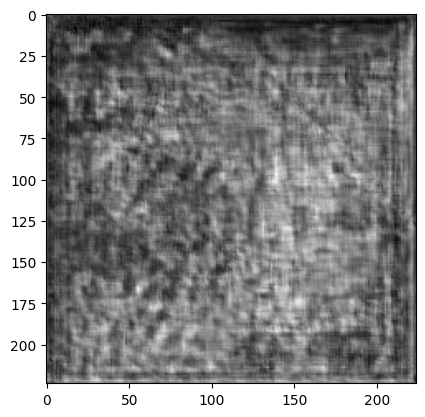

In [ ]:
# print output
plt.imshow(output.squeeze(), cmap='gray')

## 3.Train the Unet Model

In [ ]:
# define loss function
criterion = smp.utils.losses.BCELoss()

# define optimizer
optimizer = torch.optim.Adam([parameters for parameters in model.parameters() if parameters.requires_grad], lr=1e-3)

# define evaluation metric
metrics = [
    smp.utils.metrics.IoU(threshold=0.5)
]

In [ ]:
# define training epoch
train_epoch = smp.utils.train.TrainEpoch(
    model,
    loss=criterion,
    metrics=metrics,
    optimizer=optimizer,
    device='cuda',
    verbose=True,
)

In [ ]:
max_score = 0

for i in range(0, 10):
    print('\nEpoch: {}'.format(i + 1))
    train_logs = train_epoch.run(train_loader)


Epoch: 1
train: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s, bce_loss - 0.4576, iou_score - 0.6247]

Epoch: 2
train: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s, bce_loss - 0.442, iou_score - 0.6273]

Epoch: 3
train: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s, bce_loss - 0.4293, iou_score - 0.6399]

Epoch: 4
train: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s, bce_loss - 0.4192, iou_score - 0.6525]

Epoch: 5
train: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s, bce_loss - 0.4115, iou_score - 0.6637]

Epoch: 6
train: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s, bce_loss - 0.4036, iou_score - 0.671]

Epoch: 7
train: 100%|██████████| 1/1 [00:00<00:00,  2.00it/s, bce_loss - 0.3968, iou_score - 0.6752]

Epoch: 8
train: 100%|██████████| 1/1 [00:00<00:00,  1.60it/s, bce_loss - 0.3913, iou_score - 0.6812]

Epoch: 9
train: 100%|██████████| 1/1 [00:00<00:00,  1.74it/s, bce_loss - 0.3863, iou_score - 0.6864]

Epoch: 10
train: 100%|██████████| 1/1 [00:00<00:00,  1.64it/s, bce_loss - 0.3814, i

# 4. Calculate IOU Score

In [ ]:
# get sample data
image1 = Image.open('/content/satelliteimg/train/global_monthly_2018_01_mosaic_L15-0357E-1223N_1429_3296_13.tif').convert("RGB")
gt_mask1 = Image.open('/content/satelliteimg/trainannot/global_monthly_2018_01_mosaic_L15-0357E-1223N_1429_3296_13.png').convert("L")

In [ ]:
# preprocess mask
gt_mask = np.array(gt_mask1)
threshold_value = 127  # Adjust this threshold value as needed
gt_mask = (gt_mask > threshold_value).astype(np.uint8)  # Pixels above threshold become 1, others become 0
gt_mask = Image.fromarray(gt_mask * 255)  # Convert to 0-255 scale for PIL Image

# apply data augmentation
transform = Compose([
            Resize((224, 224)),
            ToTensor()
            ])

image = transform(image1)

gt_mask = transform(gt_mask)

In [ ]:
image.shape

torch.Size([3, 224, 224])

In [ ]:
model.eval()
output1 = model(image.view(1, 3, 224, 224).to("cuda")).cpu().detach().numpy()

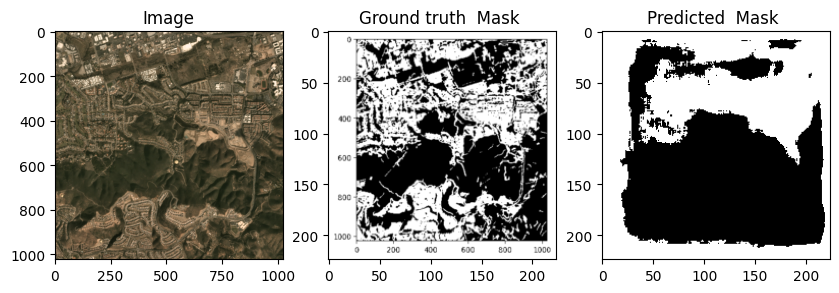

In [ ]:
plt.figure(figsize=(10, 5))

# Display the Image in the first subplot
plt.subplot(1, 3, 1)
plt.imshow(image1)
plt.title('Image')

# Display the image ground truth mask in the second subplot
plt.subplot(1, 3, 2)
plt.imshow(gt_mask.squeeze(), cmap='gray')
plt.title('Ground truth  Mask ')

# Display the predicted mask in the second subplot
plt.subplot(1, 3, 3)
plt.imshow((output1.squeeze() > 0.4).astype(int), cmap='gray')
plt.title('Predicted  Mask ')

plt.show()

In [ ]:
# convert predicted mask to flattened numpy array
mask = (output.squeeze() > 0.4).astype(int)
pred = mask.ravel().copy()

# convert ground truth mask to flattened numpy array
gt_mask = gt_mask.cpu().detach().numpy()
target = gt_mask.ravel().copy().astype(int)

# get class indices for Lane
pred_inds = pred == 1
target_inds = target == 1

# calculate intersection
intersection = pred_inds[target_inds].sum()

# calculate union
union = pred_inds.sum() + target_inds.sum() - intersection

# get IoU score
iou = (float(intersection) / float(max(union, 1)))
iou

0.3580994897959184

## 5. Validation image and predicting the mask using U-net

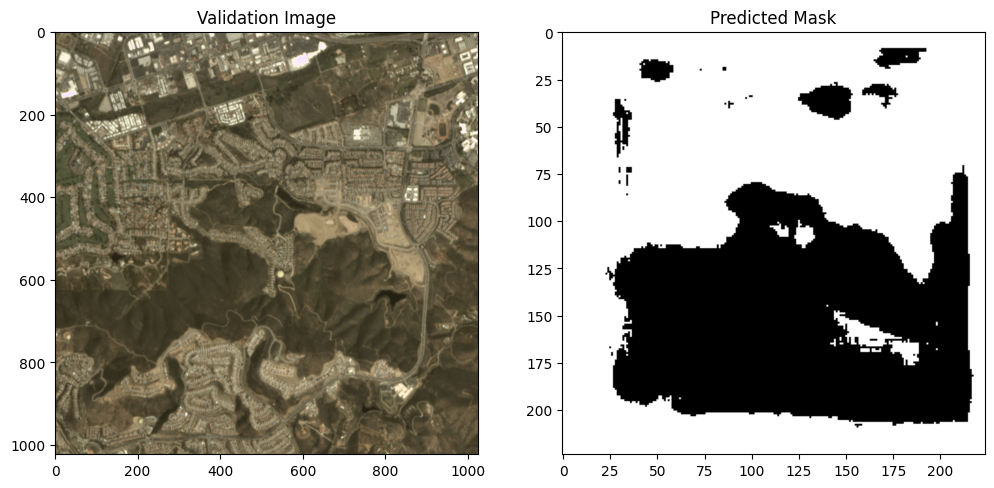

In [ ]:
val_image =Image.open('/content/satelliteimg/train/global_monthly_2018_04_mosaic_L15-0357E-1223N_1429_3296_13.tif').convert('RGB')
# apply data augmentation
transform = Compose([
            Resize((224, 224)),
            ToTensor()
            ])

test_image = transform(val_image)
model.eval()
output_test = model(test_image.view(1, 3, 224, 224).to("cuda")).cpu().detach().numpy()
predicted_mask =(output_test.squeeze()>0.3).astype(int)

# Visualize the prediction
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(val_image)
plt.title('Validation Image')

plt.subplot(1, 2, 2)
plt.imshow(predicted_mask, cmap='gray')
plt.title('Predicted Mask')

plt.show()

## Fine Tuning

In [2]:
!unzip /content/drive/MyDrive/colabdataset/SN7_data.zip

Archive:  /content/drive/MyDrive/colabdataset/SN7_data.zip
   creating: SN7_data - Copy/SN7/
   creating: SN7_data - Copy/SN7/train/
   creating: SN7_data - Copy/SN7/train/L15-0571E-1075N_2287_3888_13/
   creating: SN7_data - Copy/SN7/train/L15-0571E-1075N_2287_3888_13/images/
  inflating: SN7_data - Copy/SN7/train/L15-0571E-1075N_2287_3888_13/images/global_monthly_2018_01_mosaic_L15-0571E-1075N_2287_3888_13.tif  
  inflating: SN7_data - Copy/SN7/train/L15-0571E-1075N_2287_3888_13/images/global_monthly_2018_02_mosaic_L15-0571E-1075N_2287_3888_13.tif  
  inflating: SN7_data - Copy/SN7/train/L15-0571E-1075N_2287_3888_13/images/global_monthly_2018_03_mosaic_L15-0571E-1075N_2287_3888_13.tif  
  inflating: SN7_data - Copy/SN7/train/L15-0571E-1075N_2287_3888_13/images/global_monthly_2018_04_mosaic_L15-0571E-1075N_2287_3888_13.tif  
  inflating: SN7_data - Copy/SN7/train/L15-0571E-1075N_2287_3888_13/images/global_monthly_2018_07_mosaic_L15-0571E-1075N_2287_3888_13.tif  
  inflating: SN7_data 

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split

# Define U-Net architecture
def unet(pretrained_weights=None, input_size=(256, 256, 3)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    drop4 = tf.keras.layers.Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = tf.keras.layers.Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(drop5))
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = Conv2D(256, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(conv6))
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = Conv2D(128, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(conv7))
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = Conv2D(64, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(conv8))
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation='sigmoid')(conv9)

    model = Model(inputs=inputs, outputs=conv10)

    model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

    if pretrained_weights:
        model.load_weights(pretrained_weights)

    return model

In [5]:
# Load and preprocess dataset
def load_data(images_dir, masks_dir):
    image_files = sorted(os.listdir(images_dir))
    images = []
    masks = []

    for img_file in image_files:
        img_path = os.path.join(images_dir, img_file)
        img = load_img(img_path, target_size=(256, 256))
        img_array = img_to_array(img) / 255.0
        images.append(img_array)

        mask_path = os.path.join(masks_dir, img_file.replace(".jpg", "_mask.jpg"))
        mask_img = load_img(mask_path, target_size=(256, 256), color_mode="grayscale")
        mask_array = img_to_array(mask_img) / 255.0
        masks.append(mask_array)

    return np.array(images), np.array(masks)

images_dir = '/content/SN7_data - Copy/SN7/train/L15-0571E-1075N_2287_3888_13/images'
masks_dir = '/content/SN7_data - Copy/SN7/train/L15-0571E-1075N_2287_3888_13/images_masked'

train_images, train_masks = load_data(images_dir, masks_dir)

# Split data into training and validation sets
train_images, val_images, train_masks, val_masks = train_test_split(train_images, train_masks, test_size=0.2, random_state=42)

# Load pre-trained U-Net model
pretrained_weights_path = None  # No pre-trained weights in this example

model = unet(pretrained_weights=pretrained_weights_path, input_size=(256, 256, 3))

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_masks, validation_data=(val_images, val_masks), epochs=10, batch_size=32)

# Evaluate the model if needed
loss, accuracy = model.evaluate(val_images, val_masks)
print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")



Epoch 1/10
1/1 [==============================] - 54s 54s/step - loss: 0.6530 - accuracy: 0.1774 - val_loss: 0.6425 - val_accuracy: 0.2298
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 0.6403 - accuracy: 0.1776 - val_loss: 0.6421 - val_accuracy: 0.2297
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 0.6298 - accuracy: 0.1776 - val_loss: 0.6430 - val_accuracy: 0.2294
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 0.6243 - accuracy: 0.1774 - val_loss: 0.6500 - val_accuracy: 0.2274
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 0.6206 - accuracy: 0.1755 - val_loss: 0.6569 - val_accuracy: 0.2195
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 0.6181 - accuracy: 0.1707 - val_loss: 0.6582 - val_accuracy: 0.2106
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 0.6162 - accuracy: 0.1663 - val_loss: 0.6543 - val_accuracy: 0.2089
Epoch 8/10
1/1 [=======================

1/1 [==============================] - 0s 18ms/step


(-0.5, 255.5, 255.5, -0.5)

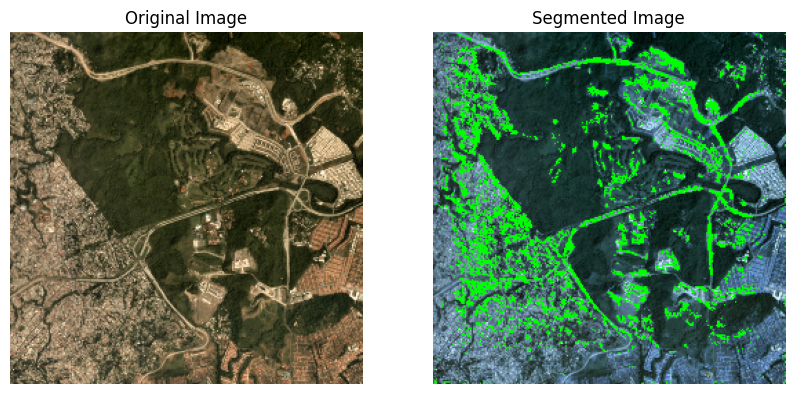

In [9]:
import cv2
import matplotlib.pyplot as plt
# Load the image
image_path = '/content/SN7_data - Copy/SN7/train/L15-0571E-1075N_2287_3888_13/images/global_monthly_2020_01_mosaic_L15-0571E-1075N_2287_3888_13.tif'
image = cv2.imread(image_path)

image = cv2.resize(image, (256, 256))
input_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
input_image = input_image / 255.0  # Normalize pixel values



# Perform prediction
segmentation_mask = model.predict(np.expand_dims(image, axis=0))

# Threshold the segmentation mask to isolate regions based on pixel intensities
threshold = 0.5
segmentation_mask_binary = np.where(segmentation_mask > threshold, 1, 0)

# Overlay the segmentation mask on the original image
segmented_image = image.copy()
segmented_image[segmentation_mask_binary.squeeze() != 0] = [0, 255, 0]  # Set non-segmented regions to black

# Display the result

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
#plt.imshow(cv2.cvtColor((segmented_image * 255).astype(np.uint8), cv2.COLOR_RGB2BGR), cmap='gray')
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')